In [11]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [55]:
#read the data
df=pd.read_csv('wifi.csv')

#transform the time data to one timestamp column
df['start_time'] = df[['connection_date','start_hour','start_minute']].apply(lambda x : '{}{}{}'.format(x[0],x[1],x[2]), axis=1)
df['start_time'] =  pd.to_datetime(df['start_time'], format='%Y%m%d%H%M')

df['end_time'] = df[['connection_date','end_hour','end_minute']].apply(lambda x : '{}{}{}'.format(x[0],x[1],x[2]), axis=1)
df['end_time'] =  pd.to_datetime(df['end_time'], format='%Y%m%d%H%M')

df=df[['user_id','start_time','end_time']]

#adding a column that caculated the time spent
df['time_spend_in_min']=(df['end_time']-df['start_time']) / pd.Timedelta(minutes=1)

#create df with aggregated data
df_grouped=df.groupby(by='user_id').agg({'start_time':('count','min'),'time_spend_in_min':('min','max','mean')})
df_grouped.columns=df_grouped.columns.droplevel(1)
df_grouped=df_grouped.reset_index()
df_grouped.columns = ['user_id', 'Visits', 'First_time' , 'Min_time_spend_in_min' ,'Max_time_spend_in_min','Avg_time_spend_in_min']

df


,user_id,start_time,end_time,time_spend_in_min
0,24635,2017-10-28 13:18:00,2017-10-28 13:25:00,7.0
1,28403,2017-10-28 08:03:00,2017-10-28 08:38:00,35.0
2,28723,2017-10-28 11:13:00,2017-10-28 11:17:00,4.0
3,29071,2017-10-28 05:47:00,2017-10-28 06:05:00,18.0
4,29431,2017-10-28 11:10:00,2017-10-28 11:33:00,23.0
...,...,...,...,...
11596,713277,2017-11-10 18:44:00,2017-11-10 18:52:00,8.0
11597,713354,2017-11-10 21:37:00,2017-11-10 21:41:00,4.0
11598,714027,2017-11-10 12:07:00,2017-11-10 12:10:00,3.0
11599,714074,2017-11-10 15:44:00,2017-11-10 15:59:00,15.0


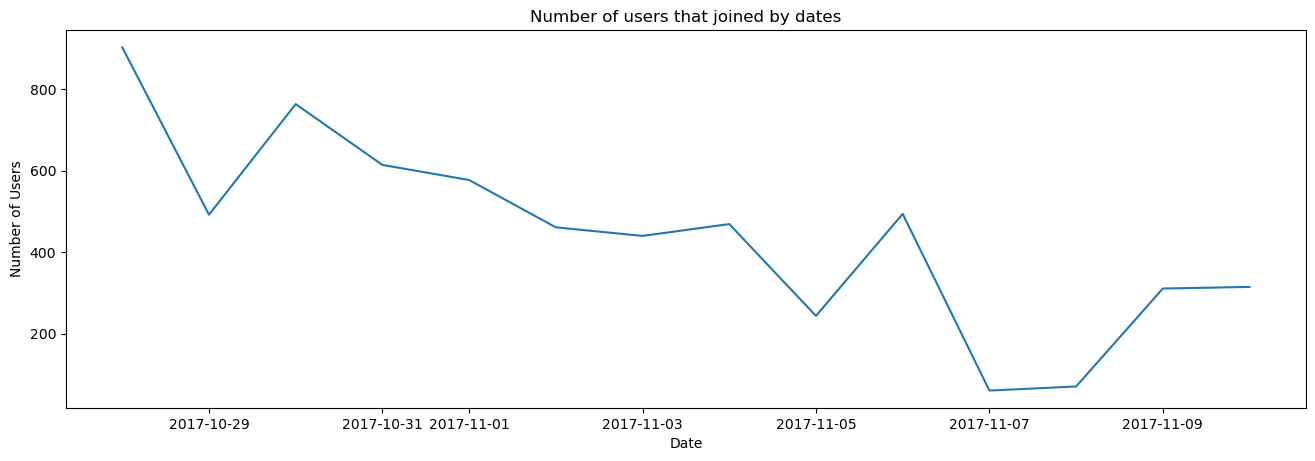

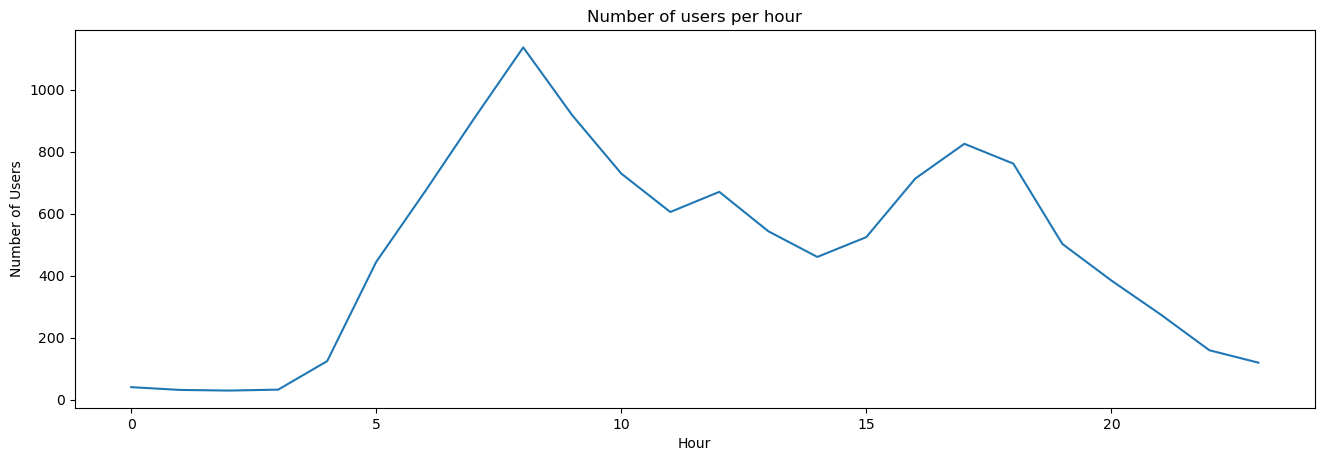

In [56]:

df_grouped['time'] = pd.to_datetime(df_grouped['First_time'])
df_grouped['date'] = df_grouped['time'].dt.date
df_grouped_by_date=df_grouped.groupby(by='date').agg({'user_id':'count'})
df_grouped_by_date=df_grouped_by_date.reset_index()

df['time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['time'].dt.hour
df_grouped_by_time=df.groupby(by='hour').agg({'user_id':'count'})
df_grouped_by_time=df_grouped_by_time.reset_index()
 
def plot_df(df, x, y, title="", xlabel="", ylabel="", dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df_grouped_by_date, 
        x=df_grouped_by_date['date'], 
        y=df_grouped_by_date['user_id'], 
        title='Number of users that joined by dates',xlabel="Date",ylabel='Number of Users')  

plot_df(df_grouped_by_time, 
        x=df_grouped_by_time['hour'], 
        y=df_grouped_by_time['user_id'], 
        title='Number of users per hour',xlabel="Hour",ylabel='Number of Users') 




